### Die Pareto-Front

Bei einer Verhandlung mit zwei oder mehr Parteien ist die *Pareto-Front* die Menge aller möglichen Verhandlungsergebnisse, die *Pareto-optimal* sind. Das bedeutet, dass keine Partei ihre Situation verbessern kann, ohne die Situation einer anderen Partei zu verschlechtern. Das Verhandlungsergebnis sollte deshalb aus dieser Menge gewählt werden. Weitere Aspekte &#150; ob das Ergebnis fair ist oder der Verhandlungsstärke der Parteien entspricht &#150; sind unabhängig von der Pareto-Optimalität.

#### Beispiel: WTO-Verhandlungen

In unserem im Anhang beschriebene Beispiel verhandeln 14 Parteien über 18 verschiedene Themen, welche in vier Bereiche zusammengefasst sind. Zu jedem Thema gibt es zwei oder drei Optionen, von denen sich die Parteien auf eine einigen müssen. Im ganzen sind daher 2'985'984 Verhandlungsergebnisse möglich. Jede Partei gibt für jede Option eine Bewertung in der Form einer ganzen Zahl zwischen -5 und 5 ab, wobei 0 "neutral" bedeutet. Die Bewertung eines Verhandlungsergebnisses durch eine Partei ist dann die Summe der Zahlen, mit welchen die Partei die 18 Optionen bewertet hat.

Die Verhandlungsergebnisse unseres Beispiels können somit als 2'985'984 Punkte in einem 14-dimensionalen Raum abgebildet werden, wo die i-te Koordinate eines Punktes die Bewertung des Verhandlungsergebnisses durch die i-te Partei darstellt. Ein Punkt in diesem Raum, ist nun *Pareto-optimal*, wenn er nicht von einem anderen *dominiert* wird, es also keinen Punkt gibt, der auf einer Koordinate strikt grösser und auf keiner Koordinate kleiner ist.

#### Der Algorithmus 

Der hier implementierte allgemeine Algorithmus, welcher mit der Funktion *get_pareto_front* aufgerufen wird, findet die Pareto-Front einer Anzahl Punkte in einem n-dimensionalen Raum, indem er von einer leeren Menge ausgehend über alle Punkte iteriert und einen Punkt der Menge hinzufügt, falls er von keinem darin enthaltenen Punkt dominiert wird. Dann entfernt er aus der Menge diejenigen Punkte, welche durch den neuen Punkt dominiert werden, und fährt mit dem nächsten Punkt weiter. Damit ist die konstruierte Menge zu jedem Zeitpunkt die Pareto-Front der schon betrachteten Punkte.

Im besten Fall macht dieser Algorithmus bei m Punkten m-1 Vergleiche (wenn nämlich jeder Punkt den vorhergehenden dominiert), im schlechtesten Fall $\frac{(m * m-1)}{2}$ (wenn kein Punkt einen anderen dominiert). In unserem Beispiel der WTO-Verhandlung sind 2'985'984 Verhandlungsergebnisse möglich, was je nach Verteilung im Raum zu zwischen $3 * 10^6$ und $4.5 * 10^{12}$ Vergleichen führt. Im ersten Fall hat der Algorithmus auf einem durchschnittlichen Laptop eine Laufzeit von einer Minute, im letzeren von 32 Jahren.

Wenn nach der Verhandlung schon ein (gute) Bewertung bekannt ist, kann mittels der Funktion *get_pareto_front_with_security_point* auch nur nach Pareto optimalen Punkten gesucht werden, welche besser als dieses Ergebnis sind, oder bestätigt werden, dass die Bewertung selbst Pareto optimal ist.

Die verwendeten Funktionen befinden sich hier:





In [1]:
# Pareto lib

import numpy as np
import matplotlib.pyplot as plt
import itertools

def _dominates(p_0, p_1):
    global n
    n = n+1
    return np.greater_equal(p_0, p_1).all()

def _add_point_to_front(f, p):
    # if any point in frontier dominates p ignore it
    for p_0 in f:
        if _dominates(p_0[1], p[1]):
            return f
    # o/w eliminate all points in frontier dominated by p
    f_0 = [p_0 for p_0 in f if not _dominates(p[1], p_0[1])]
    # then add p to frontier
    f_0.append(p)
    return f_0

def _get_pareto_front(s):
    f = []
    for p in s:
        f = _add_point_to_front(f, p)
    return f

# Berechnet die Pareto Front von s relativ zu einem Punkt sp. Projektion auf die i0-te und i1-te Koordinate
# 
# s = [[[10,9],[0,1]], Bewertung der beiden Optionen des ersten Themas durch die beiden Parteien
#      [[10,7,4],[0,1,4]] Bewertung der drei Optionen des zweiten Themas durch die beiden Parteien
#     ]
#
# sp = [10,20] 
#                                                              
def get_pareto_front_with_security_point(s,sp,i0,i1):
    i0 = i0-1
    i1 = i1-1
    l = []
    i = []
    global n
    n = 0
    for p in list(s):
        l.append([list(a) for a in zip(*list(p[:]))])
        i.append([a for a in range(len(p[0]))])
    k = np.array([t for t in itertools.product(*i)]) #keys
    v = np.array([np.array(t).sum(axis = 0) for t in itertools.product(*l)])
    c = [list(a) for a in zip(k.tolist(),v.tolist())]
    print("Anzahl Punkte: " + str(len(c)))
    if sp is not None:
        c = [a for a in c if _dominates(a[1], sp)]   # add security point
        print("\nAnzahl Punkte besser als der Security Point: " + str(len(c)))
        print("\nZum Beispiel:\n")
        for e in c[:10]:
            print(e[0],": ",e[1])
    f = np.array(_get_pareto_front(c), dtype=object, ndmin=2)
    print("\n" + str(n) + " Vergleiche\n")
    print("Die Pareto Front besteht aus den folgenden", str(len(f)), "Punkten:\n")
    for e in f:
        print(e[0],": ",e[1])
    f_x = list(np.array(list(f[:,1]))[:,i0])
    f_y = list(np.array(list(f[:,1]))[:,i1])
    
    fig = plt.figure(figsize=(8,8))
    plt.scatter(v[:,i0], v[:,i1], color = "grey", marker = ".")
    plt.scatter(f_x, f_y, color = "red", marker = "o")
    if sp is not None:
        plt.scatter(sp[i0],sp[i1], color = "blue", marker = "*")
    plt.show()

# Berechnet die Pareto Front von s. Projektion auf die i0-te und i1-te Koordinate
# 
# s = [[[10,9],[0,1]], Bewertung der beiden Optionen des ersten Themas durch die beiden Parteien
#      [[10,7,4],[0,1,4]] Bewertung der drei Optionen des zweiten Themas durch die beiden Parteien
#     ]
# 
def get_pareto_front(s,i0,i1):
    get_pareto_front_with_security_point(s,None,i0,i1)
    
def pick(a,l):
    return [[a[i][j-1] for j in l] for i in range(len(a))]

Anzahl Punkte: 2985984

Anzahl Punkte besser als der Security Point: 2

Zum Beispiel:

[0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 2, 1] :  [4, 13, 16, 0, 22, 19, 20, 12, 18, 10, 23, 10, 15, 0]
[1, 0, 1, 0, 0, 2, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 2, 1] :  [5, 19, 16, 7, 23, 19, 28, 12, 22, 16, 23, 15, 21, 3]

2985986 Vergleiche

Die Pareto Front besteht aus den folgenden 1 Punkten:

[1, 0, 1, 0, 0, 2, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 2, 1] :  [5, 19, 16, 7, 23, 19, 28, 12, 22, 16, 23, 15, 21, 3]


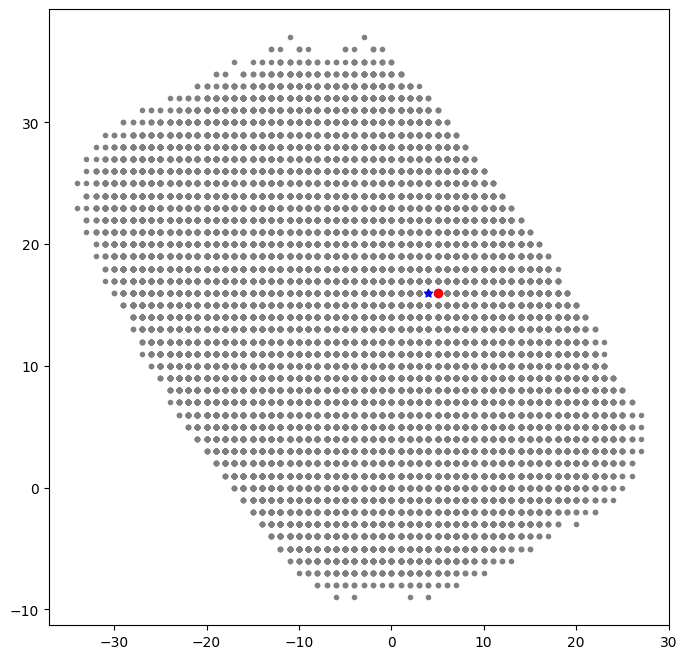

In [4]:
get_pareto_front_with_security_point(a,[4, 13, 16, 0, 22, 19, 20, 12, 18, 10, 23, 10, 15, 0],1,3)

### Anwendung auf das im Anhang beschriebenen SECO-Szenario

Als erstes werden die Präferenzen in einer Matrix gespeichert: die Präferenzen der vierzehn Parteien in der 
Waagrechten für die achtzehn Punkte in der Senkrechten.

So ist oben links \[5,3,1\] die Bewertung der ersten Partei der drei Optionen von Punkt 1

Die Bewertung eines Verhandlungsergebnisses durch eine Partei ist die Summe der Bewertungen der Optionen und 
wird vom Algorithmus berechnet.

In [3]:
a = [[[5,3,1],[4,3,0],[0,1,3],[0,2,3],[5,3,1],[4,3,2],[3,2,1],[-2,-1,0],[-1,0,1],[3,3,1],[4,3,1],[4,3,0],[3,2,1],[0,1,0]], # 1.1.a)
     [[-3,3],[4,-2],[-2,0],[1,0],[-3,3],[-3,3],[-2,3],[0,1],[0,0],[3,-1],[3,0],[-4,4],[-3,2],[-1,1]], # 1.2.a)
     [[-1,3],[-5,3],[5,-1],[-1,1],[-2,3],[-1,2],[-2,3],[0,1],[0,0],[-4,4],[-2,2],[-5,4],[-3,3],[-1,1]], # 1.2.b)
     [[-1,0],[5,3],[1,0],[-3,1],[3,1],[3,2],[3,2],[-2,3],[0,3],[2,2],[3,2],[3,1],[3,1],[2,-2]], # 2.1.a)
     [[-1,0,0],[3,2,-1],[2,1,0],[-3,0,3],[3,2,1],[3,2,1],[3,2,0],[-3,-1,0],[-2,0,0],[-1,1,1],[3,2,0],[3,2,0],[2,1,0],[-1,1,-1]], # 2.1.b)
     [[-2,-1,0],[-3,-2,1],[0,1,2],[-3,-2,-1],[1,2,2],[2,3,2],[3,2,1],[-3,-2,-1],[-3,0,0],[0,0,0],[5,4,2],[-2,-1,0],[-2,-1,0],[-3,-1,0]], # 2.1.c)
     [[3,1,-2],[4,2,-3],[-5,-3,1],[-3,0,3],[3,1,-2],[4,2,-2],[-1,3,1],[3,1,-2],[0,0,0],[4,3,-2],[3,2,-3],[5,3,-3],[3,3,0],[1,1,0]], # 2.2.a)
     [[5,3],[5,2],[2,3],[-4,-2],[5,3],[4,3],[4,3],[-3,-1],[0,0],[5,3],[4,2],[5,2],[3,2],[1,0]], # 3.1.a)
     [[5,-5,-2],[3,-3,-2],[2,-2,-1],[-2,3,3],[5,-5,-2],[4,-4,-2],[4,-4,-1],[-2,0,2],[0,0,0],[5,-5,-3],[4,-4,-3],[4,-4,-3],[2,-3,-1],[-3,3,3]], # 3.1.b)
     [[3,2],[3,2],[3,1],[-3,-4],[4,3],[4,3],[4,4],[-4,-4],[-3,-2],[4,2],[4,3],[4,4],[2,3],[-4,-4]], # 3.2.a)
     [[-3,-2],[-5,-3],[3,2],[5,3],[0,1],[-4,-2],[0,1],[-3,2],[0,3],[-5,-4],[-4,-2],[-4,-1],[3,2],[-3,-1]], # 3.3.a)
     [[0,0],[-2,0],[3,1],[4,2],[0,0],[-2,-1],[1,1],[-2,3],[0,2],[-2,0],[0,0],[-2,0],[-2,0],[-3,0]], # 3.3.b)
     [[-2,0],[-4,2],[2,0],[2,0],[1,2],[2,3],[2,2],[4,-4],[5,3],[-3,3],[1,3],[-2,3],[-2,3],[1,0]], # 4.1.a)
     [[-4,4],[-3,3],[0,0],[2,0],[-2,2],[-3,3],[0,2],[4,2],[3,5],[-3,3],[-3,3],[-3,3],[1,0],[1,0]], # 4.1.b)
     [[3,-3],[2,-2],[-3,3],[-3,4],[2,-1],[3,-2],[1,0],[-3,4],[5,3],[2,-2],[2,-2],[2,-2],[-1,2],[0,2]], # 4.1.c)
     [[-5,-3],[-3,-2],[-2,-1],[3,0],[-4,-2],[-4,-2],[-3,-1],[4,1],[2,5],[-3,-2],[-4,-2],[-3,-2],[-1,0],[1,1]], # 4.2.a)
     [[-5,-3,-1],[-4,-3,-1],[2,-2,-2],[2,4,3],[-5,-3,-1],[-4,-3,-1],[0,-2,-1],[3,4,4],[0,3,5],[-3,-3,-1],[-4,-3,-2],[-4,-3,-2],[-2,-1,0],[-1,1,2]], # 4.2.b)
     [[-3,-1],[-2,-1],[2,3],[2,3],[-2,-1],[-2,-1],[0,0],[3,4],[-2,-1],[-2,-1],[-3,-1],[-3,-1],[2,3],[1,2]] # 4.2.c)
    ]

Mit der Funktion *pick* lassen sich die Bewertungen von nur einem Teil der Parteien herausnehmen. 
So können wir die Pareto-Front für nur die erste und dritte Partei (USA und China) berechnen:

In [7]:
b = pick(a,[3,10])

In b sind nun die Präferenzen der ersten und dritten Partei bespeichert. Davon bilden wir die Front und schauen die Projektion 
auf die erste und zweite Koordinate (d.h. in diesem Fall alle) an. Wir sehen die Front als rote Line gegen Nordost.

Anzahl Punkte: 2985984

6102658 Vergleiche

Die Pareto Front besteht aus den folgenden 29 Punkten:

[1, 0, 0, 0, 1, 2, 2, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1] :  [29, 8]
[1, 0, 0, 0, 1, 2, 2, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1] :  [28, 9]
[1, 0, 1, 0, 1, 2, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1] :  [8, 29]
[1, 0, 1, 0, 1, 2, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 2, 1] :  [4, 31]
[1, 0, 1, 0, 1, 2, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1] :  [14, 25]
[1, 0, 1, 0, 1, 2, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1] :  [19, 21]
[1, 0, 1, 0, 1, 2, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1] :  [11, 27]
[1, 0, 1, 0, 1, 2, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1] :  [17, 23]
[1, 0, 1, 0, 1, 2, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1] :  [12, 26]
[1, 0, 1, 0, 1, 2, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1] :  [18, 22]
[1, 0, 1, 0, 1, 2, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1] :  [10, 28]
[1, 0, 1, 0, 1, 2, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 2, 1] :  [6, 30]
[1, 0, 1, 0, 1, 2, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1] :  [16, 24]
[1, 0, 1, 0, 1, 2, 2, 0, 0, 0, 0, 

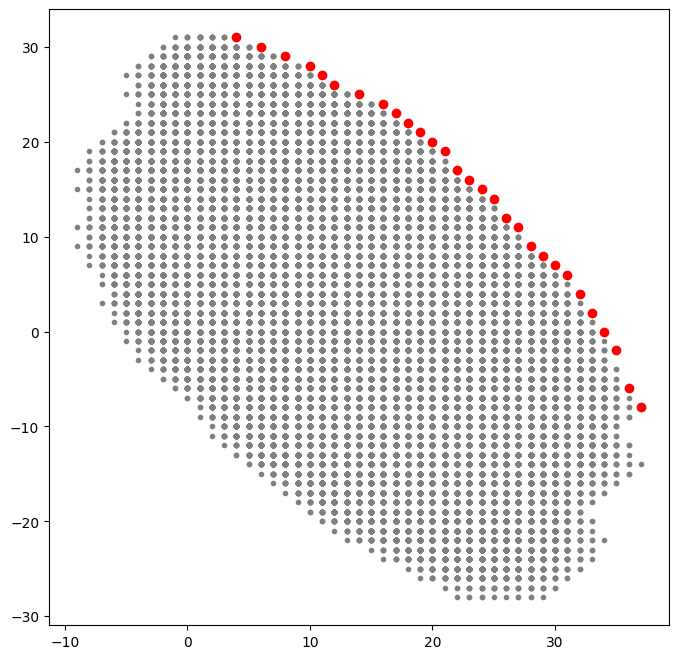

In [8]:
get_pareto_front(b,1,2)

In der gleichen Weise können wir die Pareto-Front für die ersten drei Parteien (USA, EU und China) bestimmen:

In [9]:
b = pick(a,[1,3])

In b sind nun die Präferenzen der ersten drei Parteien. Davon bilden wir die Front und schauen die Projektion 
auf die erste und dritte Koordinate an. Da die Front nun eine Projektion von drei auf zwei Dimensionen ist, sehen wir sie nicht mehr als Linie gegen Nordosten.

Anzahl Punkte: 2985984

10150405 Vergleiche

Die Pareto Front besteht aus den folgenden 142 Punkten:

[0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1] :  [4, 16, 23]
[0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1] :  [5, 18, 22]
[0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 2, 1] :  [9, 21, 18]
[0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1] :  [5, 20, 20]
[0, 0, 0, 0, 0, 2, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1] :  [2, 14, 25]
[0, 0, 0, 0, 0, 2, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1] :  [3, 16, 24]
[0, 0, 0, 0, 0, 2, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 2, 1] :  [7, 19, 20]
[0, 0, 0, 0, 0, 2, 2, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1] :  [-1, 9, 29]
[0, 0, 0, 0, 0, 2, 2, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1] :  [0, 11, 28]
[0, 0, 0, 0, 0, 2, 2, 0, 0, 0, 1, 0, 1, 1, 1, 1, 2, 1] :  [4, 14, 24]
[0, 0, 0, 0, 0, 2, 2, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1] :  [0, 13, 26]
[0, 0, 0, 0, 1, 2, 2, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1] :  [1, 10, 27]
[0, 0, 1, 0, 0, 2, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1] :  

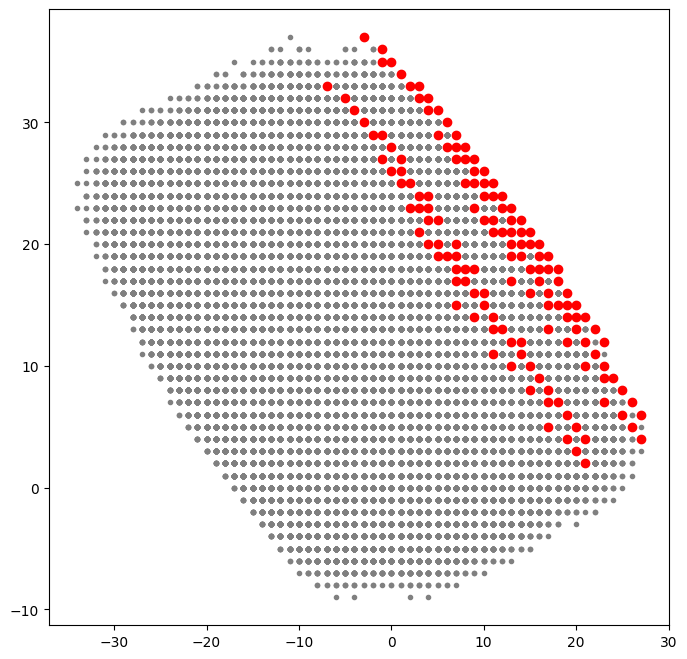

In [40]:
get_pareto_front(b,1,3)

Nun betrachten wir nochmals die ersten drei Parteien, aber nun in Bezug auf ein schon erzieltes Verhandlungsergebnis 
[6,15,17]. Dieser Punkt ist in der Grafik mit einem blauen Stern markiert. Die Pareto-Front besteht nun aus 
allen optimalen Punkten, welche das Ergebnis nochmals verbessern.

Anzahl Punkte: 2985984

Anzahl Punkte besser als der Security Point: 817

Zum Beispiel:

[0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 2, 1] :  [17, 14]
[0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 2, 1] :  [17, 14]
[0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 2, 1] :  [17, 16]
[0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1] :  [17, 14]
[0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 2, 1] :  [19, 14]
[0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 2, 1] :  [17, 14]
[0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 2, 1] :  [18, 15]
[0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 2, 1] :  [17, 15]
[0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 2, 1] :  [18, 14]
[0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 2, 1] :  [17, 16]

2987082 Vergleiche

Die Pareto Front besteht aus den folgenden 5 Punkten:

[0, 1, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 2, 1] :  [20, 15]
[0, 1, 0, 0, 0, 2, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 2, 1] :  [19, 16]
[0, 1, 0, 0, 0, 2, 0, 0, 0, 0, 

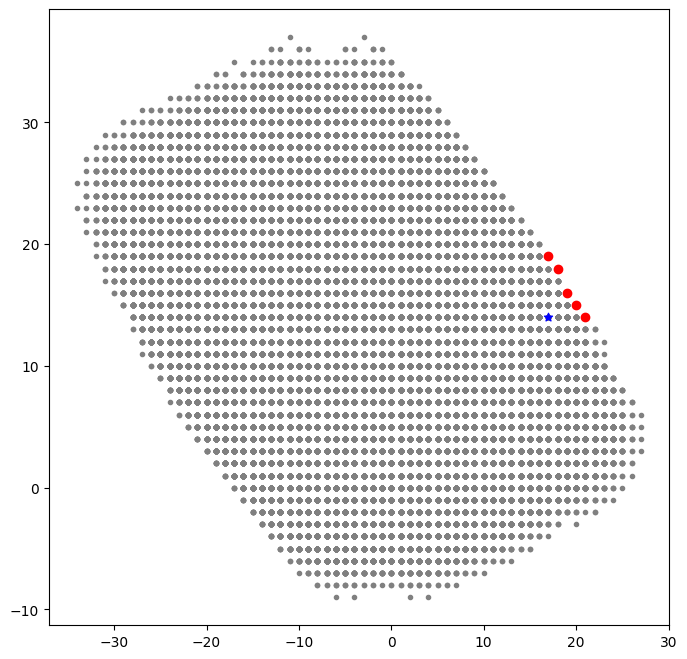

In [10]:
get_pareto_front_with_security_point(b,[17,14],1,2)


### Anhang: WTO agreement on e-commerce and digital trade

14 parties:

1. USA 
2. EU
3. China
4. India
5. Japan
6. Australia 
7. Singapore
8. South Africa
9. LDC
10. Switzerland
11. UK
12. Canada
13. Mexico
14. Brazil

and 4 issues/18 sub-issues with two or three options each:

1. Ensuring Data Free Flow with Trust

    1.1. Cross-border Data Flows 
        a) A commitment to free cross-border data flows:
           (i) legally binding “shall”
           (ii) “committed to ensuring”
           (iii) “should”
        
    1.2. Carve-outs for Policy Space
        a) Carve-out for data protection measures: 
           (i) self-judging exception plus carve-out from dispute settlement
           (ii) reference to the existing GATS Art. XIV.c.ii) exception
           
        b) Carve-out for national security measures: 
           (i) self-judging exception plus carve-out from dispute settlement
           (ii) reference to existing GATS Art. XIVbis exception
        
2. Regulation the Digital Economy

    2.1. Consumer Protection
        a) Commitment to establish a consumer protection law 
           (i) legally binding “shall” vs 
           (ii) shall endeavor 
           
        b) Equal protection online/offline consumers: 
           (i) unqualified (full) commitment vs 
           (ii) to the extent possible/practicable vs 
           (iii) to the extent provided by its domestic legal framework
           
        c) Commitment to introduce Online Dispute Resolution Systems 
           (i) shall vs 
           (ii) shall endeavor vs 
           (iii) recognizing the benefits of ODR

    2.2. Open Internet
        a) Commitment to enable consumers to access and publish information of their choice on the internet 
           (i) unqualified commitment vs. 
           (ii) shall endeavour vs. 
           (iii) subject to Member’s domestic framework
        
3. Market Access

    3.1. Customs Duties on electronic transmissions
        a) Prohibit customs duties on electronic transmissions 
           (i) permanently vs. 
           (ii) temporarily until the next WTO Ministerial Conference
           
        b) Contents of electronic transmissions: 
           (i) clarify that contents are integral part of transmissions vs 
           (ii) clarify that they are not part of transmissions vs (iii) leave question unresolved

    3.2. Trade in Goods/Tariff reduction
        a) Options: 
           (i) Commitment that all Members join the Information Technology Agreement upon conclusion vs 
           (ii) establish modalities for tariff reduction of ICT-goods one year after conclusion

    3.3. Temporary Entry and Sojourn of Electronic Commerce-Related Personnel 
        a) Temporary Entry: Commitment to allow entry for e-commerce related personnel 
           (i) unqualified (full) commitment vs 
           (ii) shall endeavor
           
        b) Publication of information related to temporary and online processing of work permit applications: 
           (i) unqualified commitment vs 
           (ii) soft commitment
        
4. Bridging the Digital Divide

    4.1. Technical Assistance (TA)
        a) (i) hard or 
           (ii) soft commitment to provide TA
           
        b) Donors: 
           (i) developed countries only or 
           (ii) developed and developing countries in a position to do so
           
        c) Recipients: 
           (i) LDCs only or 
           (ii) all developing countries

    4.2. Special and Differential Treatment options (can be alternative or cumulative):
        a) Total carve-out for 
           (i) Developing Countries or 
           (ii) LDCs from all obligations
           
        b) Specific carve-outs for Developing Countries for Article 1 (Cross-border data flows) or Article 3 (Market Access), or only parts of it (i.e. 3.2 and 3.3)
        
        c) Longer Transition periods for Developing countries / LDCs for implementation of 
           (i) the whole agreement or
           (ii) specific articles.



Input: \[Points to all parties\] for each issue



#### Daniel Zulaufs Erklärung dazu

Bezüglich Gewichtung habe Folgendes Kriterien verwendet, wie in der Sitzung vom 20. Januar 2023 besprochen: Ein für eine Partei wichtiges Thema wird für diese Partei von -5 bis +5 gewichtet, wobei 0 neutral ist. Ein für eine Partei mittelwichtiges Thema wird für diese Partei von -3 bis + 3 gewichtet und ein für eine Partei wenig wichtiges Thema wird für diese Partei von -1 bis +1 gewichtet. 

Bewertungsprobleme gab es bei 4.1. Technical Assistance für denjenigen Entwicklungsländer, welche TA von den Industrieländern erhalten möchten, selber aber keine an andere EL oder LDCs geben wollen/können. Denn diese sind für ein hard commitment für Industrieländer aber kein hard commitment für sich selber. Ich habe für diese Kategorie von Ländern als Kompromiss deshalb teilweise leicht positive und teilweise leicht negative Werte eingegeben.